In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader

In [3]:
# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
    def forward(self, z):
        return self.net(z)


In [4]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)


In [5]:
G = Generator()
D = Discriminator()

In [6]:
criterion = nn.BCELoss()
opt_G = optim.Adam(G.parameters(), lr=0.005)
opt_D = optim.Adam(D.parameters(), lr=0.005)


In [7]:
epochs = 2000
batch_size = 32

D_losses, G_losses = [], []
for epoch in range(epochs):
    # Real data
    real_data = torch.randn(batch_size, 1) * 0.5 + 3
    real_labels = torch.ones(batch_size, 1)

    # Fake data
    noise = torch.randn(batch_size, 1)
    fake_data = G(noise)
    fake_labels = torch.zeros(batch_size, 1)

    # Train Discriminator
    D.zero_grad()
    output_real = D(real_data)
    output_fake = D(fake_data.detach())
    loss_real = criterion(output_real, real_labels)
    loss_fake = criterion(output_fake, fake_labels)
    loss_D = loss_real + loss_fake
    loss_D.backward()
    opt_D.step()

    # Train Generator
    G.zero_grad()
    output_fake_for_G = D(G(noise))
    loss_G = criterion(output_fake_for_G, torch.ones(batch_size, 1))
    loss_G.backward()
    opt_G.step()

    D_losses.append(loss_D.item())
    G_losses.append(loss_G.item())

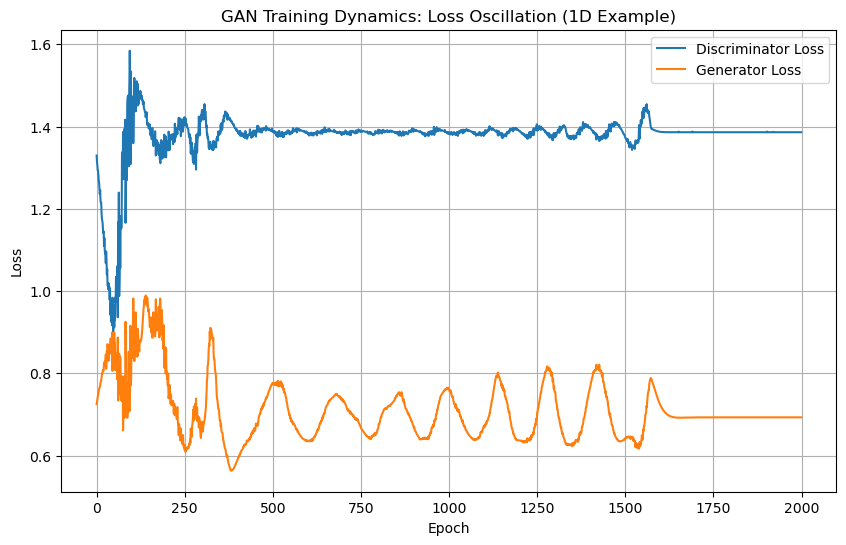

In [8]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(D_losses, label="Discriminator Loss")
plt.plot(G_losses, label="Generator Loss")
plt.title("GAN Training Dynamics: Loss Oscillation (1D Example)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
